https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.09-Text-and-Annotation.ipynb

Text and Annotation
Văn bản và Chú thích



Tạo ra một hình dung tốt bao gồm việc hướng dẫn người đọc để nhân vật đó kể một câu chuyện. Trong một số trường hợp, câu chuyện này có thể được kể theo cách hoàn toàn trực quan, không cần thêm văn bản, nhưng trong những trường hợp khác, cần có các dấu hiệu và nhãn văn bản nhỏ. Có lẽ các loại chú thích cơ bản nhất mà bạn sẽ sử dụng là nhãn trục và tiêu đề, nhưng các tùy chọn vượt ra ngoài điều này. Hãy cùng xem một số dữ liệu và cách chúng ta có thể hình dung và chú thích nó để giúp truyền tải thông tin thú vị. Chúng tôi sẽ bắt đầu bằng cách thiết lập sổ ghi chép để vẽ và nhập các chức năng chúng tôi sẽ sử dụng:

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

Ví dụ: Ảnh hưởng của Ngày lễ đối với Sinh tại Hoa Kỳ
Hãy quay lại một số dữ liệu mà chúng tôi đã làm việc với Earler, trong "Ví dụ: Dữ liệu về tỷ lệ sinh", trong đó chúng tôi đã tạo một biểu đồ về số lần sinh trung bình trong suốt năm dương lịch; như đã đề cập, dữ liệu này có thể được tải xuống tại https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.
Chúng tôi sẽ bắt đầu với cùng một quy trình làm sạch mà chúng tôi đã sử dụng ở đó và vẽ sơ đồ kết quả:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


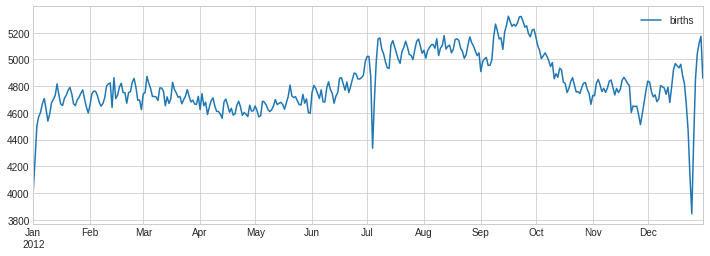

In [3]:
births = pd.read_csv('/content/drive/MyDrive/Tổng hợp sách/data vizualization/Datasets/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Khi chúng ta truyền đạt dữ liệu như thế này, thường hữu ích khi chú thích một số đặc điểm của cốt truyện để thu hút sự chú ý của người đọc. Điều này có thể được thực hiện theo cách thủ công với lệnh plt.text / ax.text, lệnh này sẽ đặt văn bản ở một giá trị x / y cụ thể:

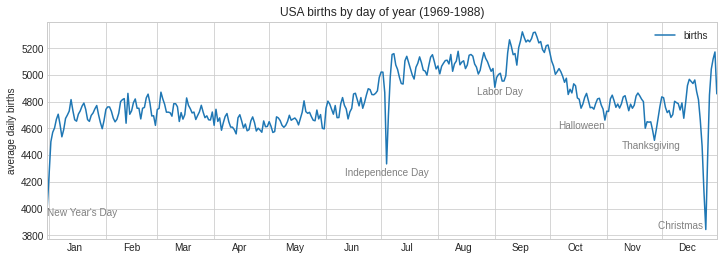

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Arrows and Annotation
Mũi tên và chú thích

Cùng với dấu tích và văn bản, một dấu chú thích hữu ích khác là mũi tên đơn giản.

Vẽ mũi tên trong Matplotlib thường khó hơn nhiều so với việc bạn mặc cả. Mặc dù có sẵn một hàm plt.arrow (), tôi không khuyên bạn nên sử dụng nó: các mũi tên mà nó tạo ra là các đối tượng SVG sẽ tùy thuộc vào tỷ lệ khung hình khác nhau của các ô của bạn và kết quả hiếm khi giống như người dùng mong muốn. Thay vào đó, tôi khuyên bạn nên sử dụng hàm plt.annotate (). Hàm này tạo ra một số văn bản và một mũi tên, và các mũi tên có thể được chỉ định rất linh hoạt.

Ở đây, chúng tôi sẽ sử dụng chú thích với một số tùy chọn của nó:

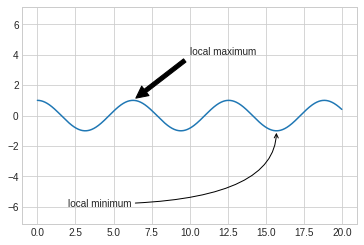

In [6]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));


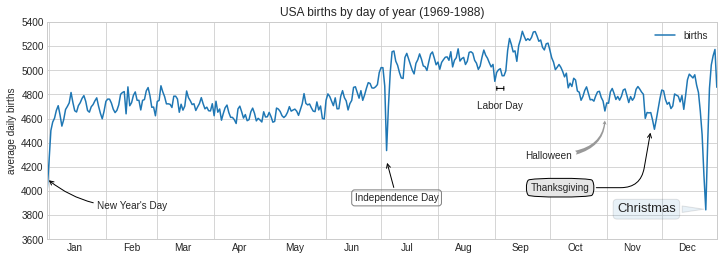

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

Bạn sẽ nhận thấy rằng các thông số kỹ thuật của các mũi tên và hộp văn bản rất chi tiết: điều này cung cấp cho bạn sức mạnh để tạo gần như bất kỳ kiểu mũi tên nào bạn muốn. Thật không may, điều đó cũng có nghĩa là các loại tính năng này thường phải được tinh chỉnh theo cách thủ công, một quá trình có thể rất tốn thời gian khi sản xuất đồ họa chất lượng xuất bản! Cuối cùng, tôi sẽ lưu ý rằng kết hợp các kiểu trước đây không phải là phương pháp hay nhất để trình bày dữ liệu, mà được đưa vào như một minh chứng về một số tùy chọn có sẵn.